In [199]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics  import root_mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

# BUNDESBANK Dataset ==============================

In [200]:
bank = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv',index_col=0)
y = bank['Value']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((565,), (12,))

In [201]:
from pmdarima.arima import auto_arima

# Auto ARIMA

In [202]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.724 seconds


In [203]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

91.10508105558864

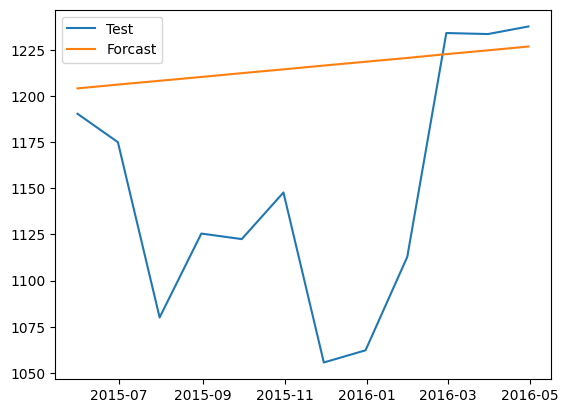

In [204]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# Auto SARIMA

In [205]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, 
                   seasonal=True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.51 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.429, Time=2.69 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.712, Time=5.08 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.326, Time=5.80 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.99 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.22 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=3.72 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=4.56 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.15 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [206]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

92.67159545834376

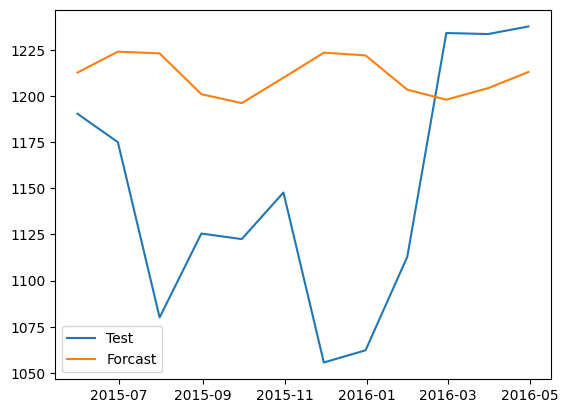

In [207]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# AusGAS Dataset ================================ 

In [310]:
ag =pd.read_csv('AusGas.csv',index_col=0)
y = ag['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((464,), (12,))

In [209]:
ag.head()

,GasProd
Month,
Jan-1956,1709
Feb-1956,1646
Mar-1956,1794
Apr-1956,1878
May-1956,2173


<Axes: xlabel='Month'>

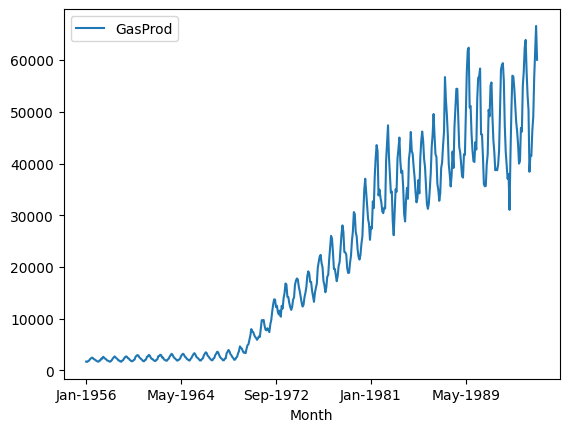

In [210]:
ag.plot()

### Auto ARIMA

In [211]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.049, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8323.032, Time=1.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.161, Time=1.04 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.437, Time=1.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.293, Time=1.05 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8391.009, Time=1.84 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

In [212]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

2580.7662520472354

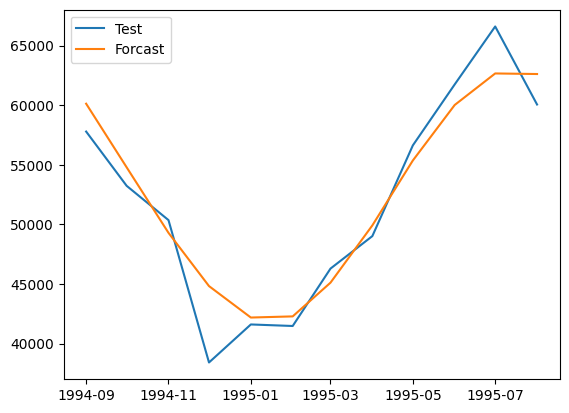

In [213]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

### Auto SARIMA

In [214]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, 
                   seasonal=True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=1.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8173.155, Time=1.98 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.75 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.663, Time=3.22 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8230.506, Time=3.66 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.58 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.46 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [215]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

3892.8911918973363

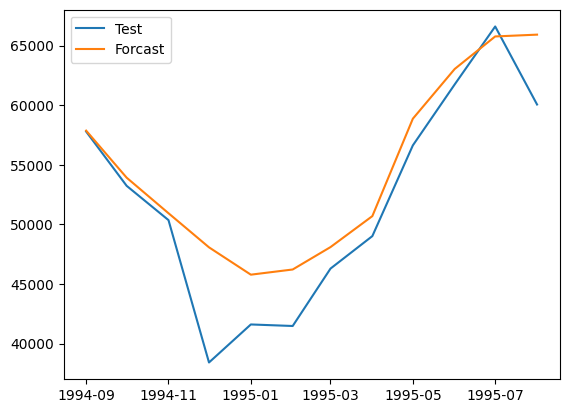

In [216]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

### Holt's Model

In [217]:
from statsmodels.tsa.api import Holt

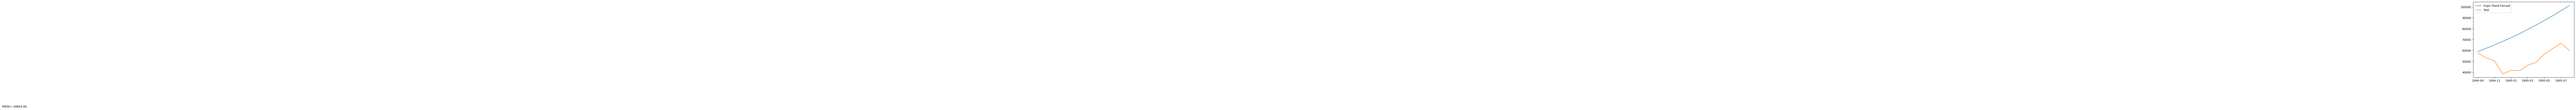

In [218]:
holt = Holt(y_train, exponential=True)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

holt_expo = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_expo),2)
plt.text(0.25, 7700, 'RMSE= '+str(error))
plt.plot(holt_expo, label = 'Expo Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Holt - Winters Trend Method

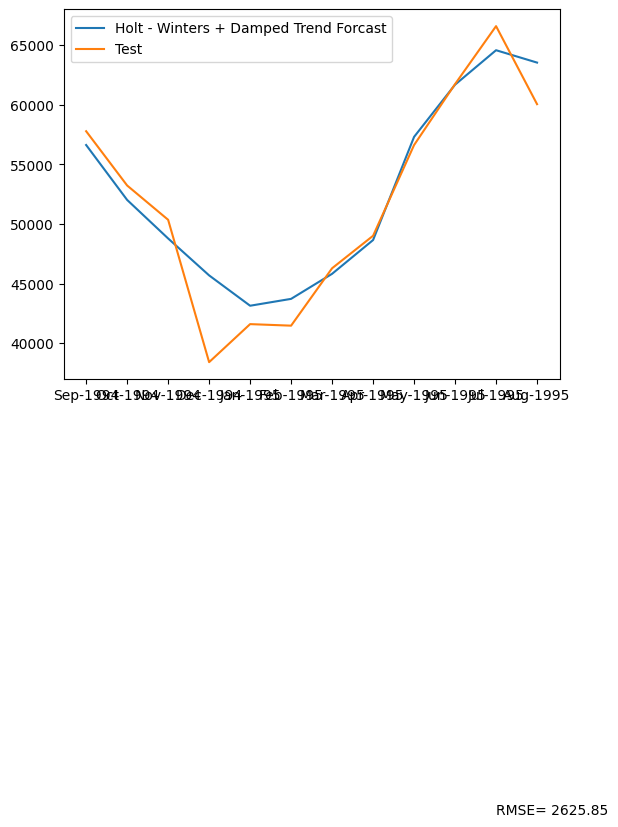

In [311]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add', damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(10,500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

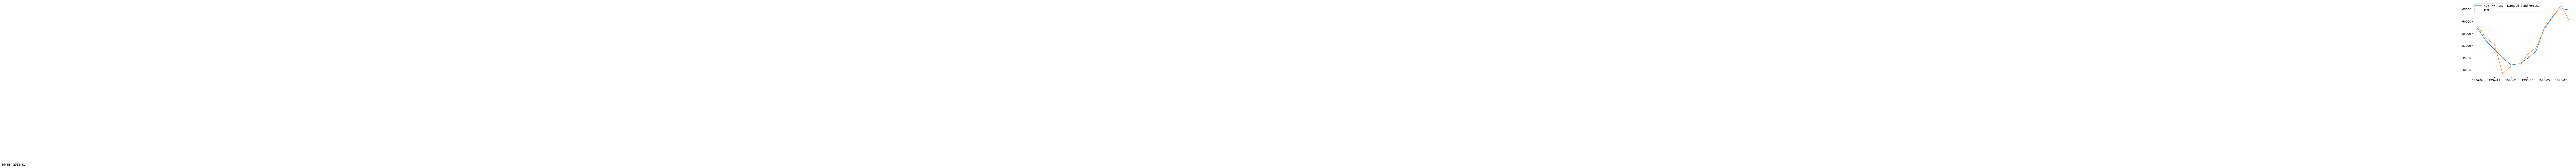

In [220]:
alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul',damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# SHAMPOO SELL Dataset =============================

In [221]:
ss = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', index_col=0)
ss.head()

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [222]:
y = ss['Sales of shampoo over a three year period']
y_train = y[:-6]
y_test = y[-6:]
y_train.shape, y_test.shape

((30,), (6,))

# holt's + Damped + add

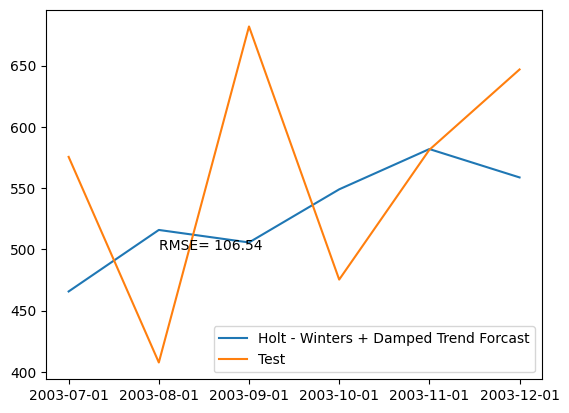

In [223]:
alpha, beta, gamma = 0.1, 0.5, 0.2
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma)
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# holt's + Damped + Mul

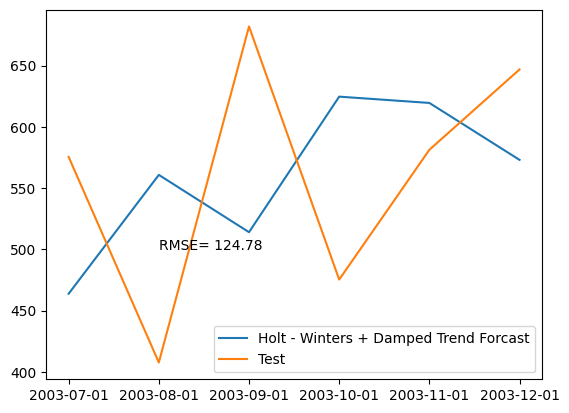

In [224]:
alpha, beta, gamma = 0.1, 0.5, 0.2
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul')
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma)
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Auto ARIMA

In [225]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.396 seconds


In [226]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

142.04839223285487

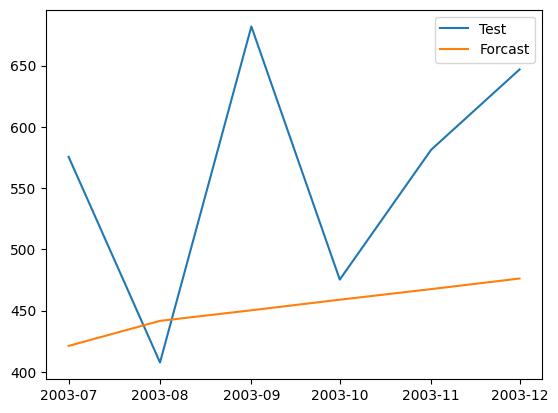

In [227]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# Auto SARIMA

In [228]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, 
                   seasonal=True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.76 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.82 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.40 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.28 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.62 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.12 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

In [229]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

158.70255913746914

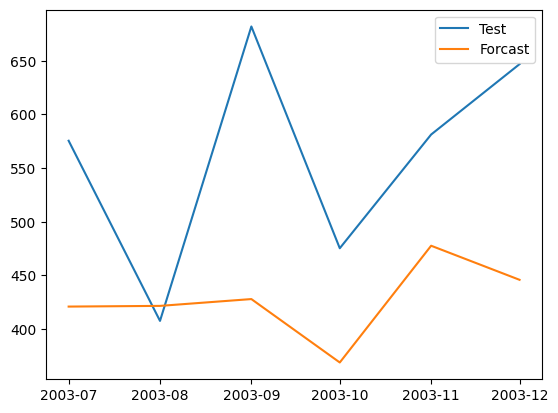

In [230]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# Holt's Exponentional    --- Best Fitted for Shampoo dataset

In [240]:
alpha, beta, gamma = 0.1, 0.5, 0.2
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma)
fcast6 = fit6.forecast(len(y_test))


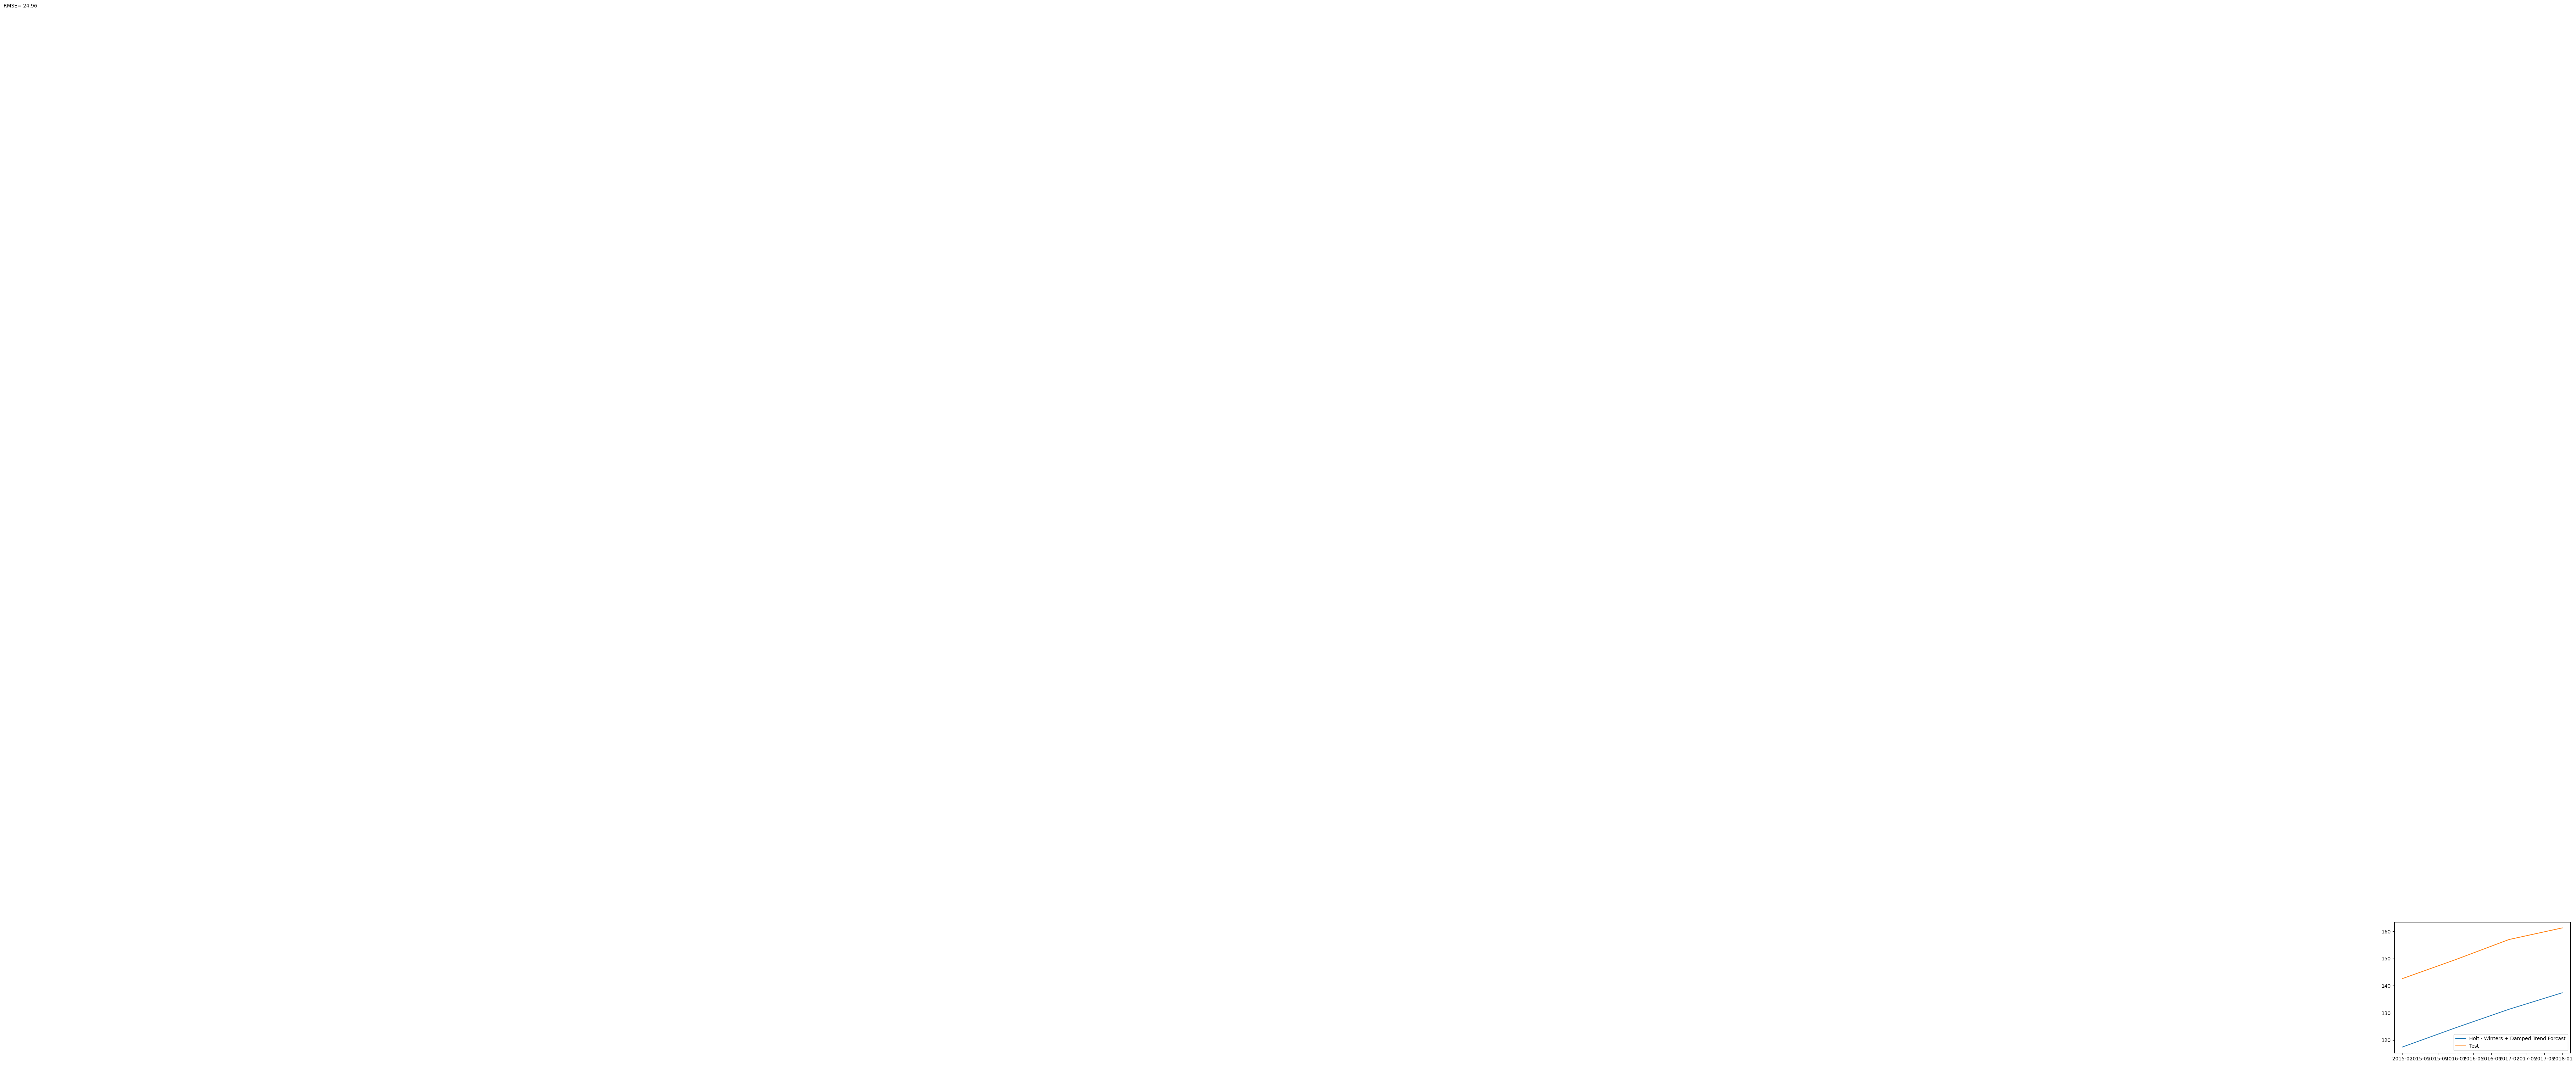

In [241]:

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1, 500, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# WEGM Dataset ========================

In [299]:
wegm = pd.read_csv('WGEM-IND_CPTOTNSXN.csv',index_col=0)
y = wegm['Value']
y_train = y[:-4]
y_test = y[-4:]

# Holt's + ExponentialSmoothing + add

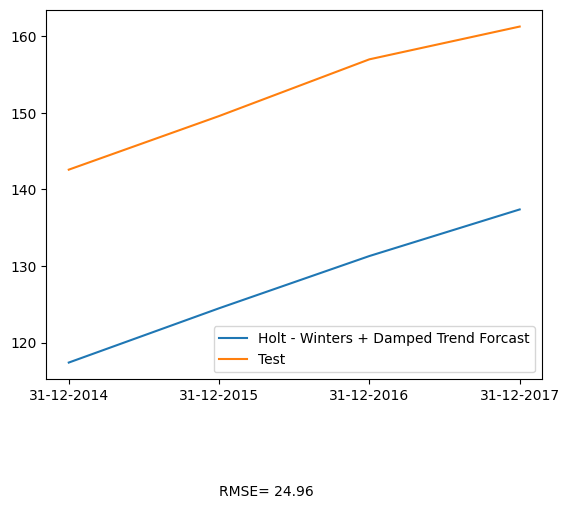

In [233]:
alpha, beta, gamma = 0.1, 0.5, 0.2
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma)
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1,100, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Auto Sarima

In [234]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, 
                   seasonal=True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=91.240, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=93.209, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=92.839, Time=0.16 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=91.252, Time=0.06 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=90.845, Time=0.13 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=92.839, Time=0.18 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=91.382, Time=0.23 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 5.275 seconds


In [235]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

12.346334442793342

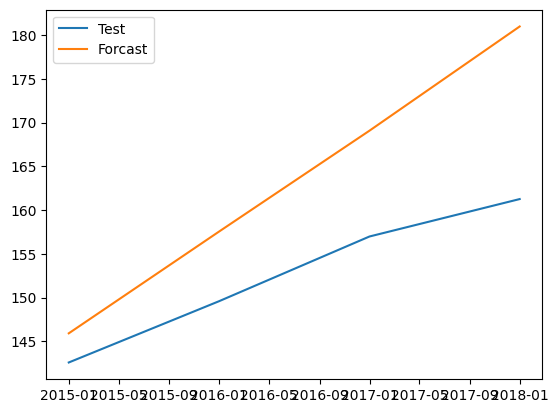

In [236]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# Auto SARIMA

In [237]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.883 seconds


In [238]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

15.240717754968145

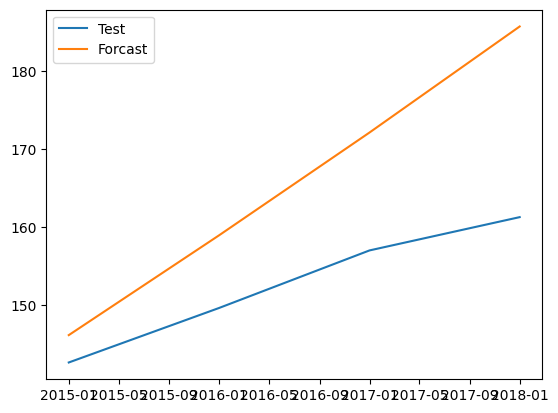

In [239]:
y_test.index = y_pred.index
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# Holt's linear  ---- Best Fitted For WEGM Dataset

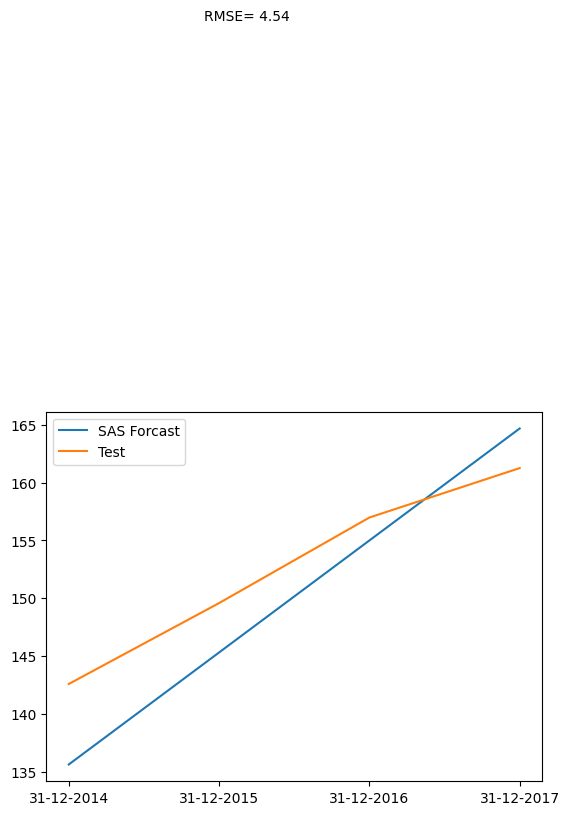

In [283]:
holt = Holt(y_train)
alpha, beta = 0.3, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

holt = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt),2)
plt.text(0.9, 200, 'RMSE= '+str(error))
plt.plot(holt, label = 'SAS Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Predicting for Next 3 Years

In [303]:
wegm = pd.read_csv('WGEM-IND_CPTOTNSXN.csv',index_col=0)
y = wegm['Value']

In [304]:
holt = Holt(y)
fit1 = holt.fit()
fcast1 = fit1.forecast(3)
fcast1

2018-12-31    166.180982
2019-12-31    170.880303
2020-12-31    175.579624
Freq: YE-DEC, dtype: float64

In [305]:
fcast1.index = pd.DatetimeIndex( fcast1.index).to_period('Y')
y.index = pd.DatetimeIndex( y.index).to_period('Y')


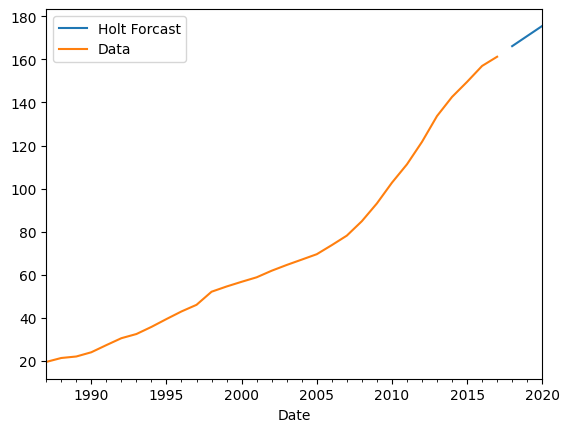

In [307]:
y = wegm['Value']
fcast1.plot(label = 'Holt Forcast')
y.plot(label='Data')
plt.legend(loc = 'best')
plt.show()